# BMIF 201 Problem Set 1
### Michelle M. Li

*Discussed and collaborated with Guanlan Dong, Katherine Duchinski, Arya Kaul, Dan Weiner, Brandon Sie, Maha Shady, Trevor Manz, Greg Brunette, Basheer Becerra, and Jayoung Ryu.*

## Question 1

Let the entropy be
$$J(x) = -\sum^k_{i}(1 - p_i) log(1-p_i)$$
where $p_i = \frac{x_i}{N}$ is the probability of $i$ allele in the population of $N$.

We will use the Taylor Expansion to approximate $J(X)$ with degree 2. To prepare for this, the first partial derivative is
$$\frac{\partial J(x)}{\partial x_i} = \frac{1}{N}(log(1 - \frac{x_i}{N}) + 1)$$

and the second partial derivative is
$$\frac{\partial^2 J(x)}{\partial^2 x_i^2} = \frac{-1}{N^2 - Nx_i}$$

Now, we can calculate the change in entropy over one time step (i.e. from generation $t$ to generation $t + 1$). First, let us denote the change in $x$ through one generation by $\Delta x$. Using the Taylor Expansion with degree 2 to approximate $\left< J(x + \Delta x) \right>$,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) + \sum^k_i \frac{\partial J(x)}{\partial x_i} \Delta x_i + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial x_i \partial x_j} \Delta x_i \Delta x_j \right>$$

Applying the linearity of expectations property, 

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \sum^k_i \frac{\partial J(x)}{\partial x_i} \left< \Delta x_i \right> + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial x_i \partial x_j} \left< \Delta x_i \Delta x_j \right>$$

Now, as discussed in class, $\left< \Delta x \right> = 0$ because the expectation for each allele is equal across timepoints. To briefly show this,

$$\left< \Delta x \right> = \left< x_{t + 1} - x_{t} \right> = \left< x_{t + 1} \right> - \left< x_{t} \right>$$

Using the Tower property,

$$\left< x_{t + 1} \right> - \left< x_{t} \right> = \left<\left< x_{t + 1} \right>\right> - \left< x_{t} \right>$$ 

Recall from lecture that $\left< x_{t+1} \right> = Np_t = x_t$. So, we can simplify the expression into

$$\left<\left< x_{t + 1} \right>\right> - \left< x_{t} \right> = \left< x_t \right> - \left< x_{t} \right> = 0$$

As a result, we can remove the term with $\left< \Delta x_i \right>$.

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial x_i \partial x_j} \left< \Delta x_i \Delta x_j \right>$$

Suppose $i = j$,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1}\sum^k_{j = 1} \frac{\partial^2 J(x)}{\partial^2 x_i^2} \left< \Delta x_i^2 \right>$$

Substituting in the second partial derivative from above,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1} \frac{-1}{N^2 - Nx_i} \left< \Delta x_i^2 \right>$$

Recall that

$$Var(x) = \left< x^2 \right> -  \left< x \right>^2 = \left< x^2 \right> - 0 = \left< x^2 \right>$$

So, we can rewrite $\left< J(x + \Delta x) \right>$ as

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> + \frac{1}{2}\sum^k_{i = 1} \frac{-1}{N^2 - Nx_i} Var(x)$$

Since this is a multinomial distribution, we know that the variance is $N(\frac{x_i}{N})(1 - \frac{x_i}{N})$, which we can substitute in

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2}\sum^k_{i = 1} \frac{1}{N^2 - Nx_i} \left( N(\frac{x_i}{N})(1 - \frac{x_i}{N}) \right)$$

Multiplying all the terms and factoring out $N$ in the denominator,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2}\sum^k_{i = 1} \frac{x_i(N - x_i)}{N(N - x_i)}$$

We can cancel out $(N - x_i)$ to get

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2}\sum^k_{i = 1} \frac{x_i}{N}$$

Using $\sum^k_{i = 1} x_i = N$ to simplify the expression,

$$\left< J(x + \Delta x) \right> \approx \left< J(x) \right> - \frac{1}{2N}$$

So, the expected change in Shannon entropy from generation $t$ to generation $t + 1$ is

$$\left< \Delta J(x) \right> = \left< J(x + \Delta x) \right> - J(x) = \frac{-1}{2N}$$

Now, to calculate the fixation time $T$, we start by stating that

$$J(x) - T \left< \Delta J(x) \right> = 0$$

which can be simplified into 

$$T = \frac{J(x)}{\left< \Delta J(x) \right>}$$

Finally, the fixation time can be expressed as
$$T = 2NJ(x)$$

## Question 2

### Part (a)

In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt

In [26]:
#Simulation Function
def wf_sim(n, p_init, n_sim):
    simulations = []
    times_to_fixation = []
    
    #Run n_sim number of simulations with the given parameters
    for s in range(n_sim):
        p = p_init
        total_n_A = []
        fixated = False
        i = 0 #Generation
        
        #Continue simulating one population until fixation
        while (fixated == False):
            
            #Draw from binomial distribution
            curr_n_A = numpy.random.binomial(n, p)
            total_n_A.append(curr_n_A)
            
            #Calculate new p
            p = curr_n_A/n
            
            #Keep track of generation count
            i += 1
            
            #Save time to fixation
            if (p == 1 or p == 0) & (fixated == False): 
                times_to_fixation.append(i)
                fixated = True
        
        #Save simulation run
        simulations.append(total_n_A)
    return(simulations, times_to_fixation)

#Calculate expectations and variances
def wf_sim_expvar(curr_n, list_p, n_sim):
    expectations = []
    variances = []
    
    #Iterate through list of p
    for curr_p in list_p:
        
        #Simulate
        simulations, times_to_fixation = wf_sim(curr_n, curr_p, n_sim)
        
        #Save expectation
        expectations.append(numpy.mean(times_to_fixation))
        
        #Save variance
        variances.append(numpy.var(times_to_fixation))
    return expectations, variances

#Simulate the expected time to fixation (Shannon entropy)
def exp_t_fix(p_list, n):
    expected_t_fix = []

    #Iterate through list of p
    for p in p_list:

        #Calculate expected time to fixation
        t_fix = 2*n*(-p*numpy.log(p) - (1 - p)*numpy.log(1 - p))

        #Save expectation
        expected_t_fix.append(t_fix)
    return expected_t_fix


### Numerically approximate the **variance** in fixation times as a function of population size for a biallelic locus with $p = 0.5$

In [3]:
variances = []
n_pop = [10, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]
for n_curr in n_pop:
    
    #Simulate
    simulations, times_to_fixation = wf_sim(n = n_curr, p_init = 0.5, n_sim = 1000)
    
    #Save observed variance to fixation
    variances.append(numpy.var(times_to_fixation))
    
#Observed variance to fixation
variances

[95.7064,
 10913.709084000002,
 66265.520519,
 233786.152775,
 668400.567975,
 1077229.4529559999,
 6343148.414359,
 25731905.628359,
 57194192.66396399,
 98989581.200336]

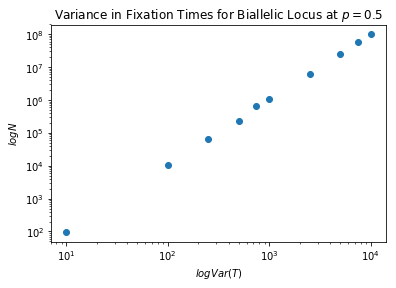

In [4]:
#Variances
plt.loglog(n_pop, numpy.array(variances).T, 'o')
plt.xlabel("$log Var(T)$")
plt.ylabel("$log N$")
plt.title("Variance in Fixation Times for Biallelic Locus at $p = 0.5$")
plt.show()

In this log-log plot, the slope $m = 2$ and so the variance is $$Var(T) = N^2$$
where $T$ is the time to fixation for a given population size $N$ and starting allele frequency $p = 0.5$.

### Simulations

In [3]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 2000

In [4]:
#Run N = 10 simulation
expectations_N10, variances_N10 = wf_sim_expvar(curr_n = 10, list_p = p, n_sim = n_sim)

In [5]:
#Run N = 50 simulation
expectations_N50, variances_N50 = wf_sim_expvar(curr_n = 50, list_p = p, n_sim = n_sim)

In [6]:
#Run N = 100 simulation
expectations_N100, variances_N100 = wf_sim_expvar(curr_n = 100, list_p = p, n_sim = n_sim)

In [7]:
#Run N = 500 simulation
expectations_N500, variances_N500 = wf_sim_expvar(curr_n = 500, list_p = p, n_sim = n_sim)

In [8]:
#Run N = 1000 simulation
expectations_N1000, variances_N1000 = wf_sim_expvar(curr_n = 1000, list_p = p, n_sim = n_sim)

In [9]:
#Run N = 2500 simulation
expectations_N2500, variances_N2500 = wf_sim_expvar(curr_n = 2500, list_p = p, n_sim = n_sim)

In [10]:
#Run N = 5000 simulation
expectations_N5000, variances_N5000 = wf_sim_expvar(curr_n = 5000, list_p = p, n_sim = n_sim)

In [11]:
#Run N = 10000 simulation
expectations_N10000, variances_N10000 = wf_sim_expvar(curr_n = 10000, list_p = p, n_sim = n_sim)

### **Interpretation:** Variance in fixation time as a function of starting allele frequency

The variance in fixation time for a given population as a function of the starting allele frequency is quadratic, but scaled on the y-axis by some constant $b$. The constant $b$ is a function of the population size.

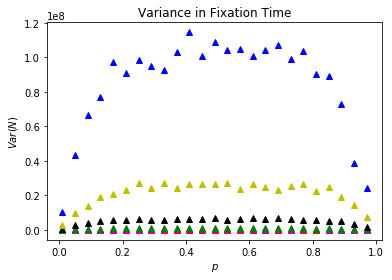

In [12]:
#Variances
plt.plot(p, numpy.array(variances_N10).T, 'b^', 
         p, numpy.array(variances_N50).T, 'c^',
         p, numpy.array(variances_N100).T, 'r^', 
         p, numpy.array(variances_N500).T, 'm^',
         p, numpy.array(variances_N1000).T, 'g^', 
         p, numpy.array(variances_N2500).T, 'k^',
         p, numpy.array(variances_N5000).T, 'y^',
         p, numpy.array(variances_N10000).T, 'b^')
plt.title("Variance in Fixation Time")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

To examine the variance at each $N$ more closely, below are the individual plots for variance in fixation time at a given $N$. In the following plots, it is more clear that there is greater variance around $p = 0.5$ across all $N$. When scaled, the shapes of the curves remain consistent across all $N$.

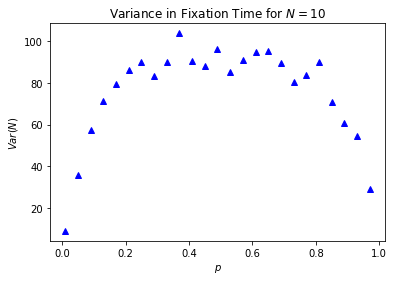

In [13]:
#Variances at N = 10
plt.plot(p, numpy.array(variances_N10).T, 'b^')
plt.title("Variance in Fixation Time for $N = 10$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

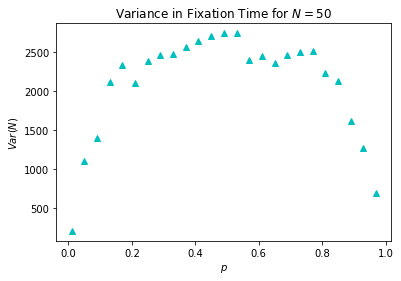

In [14]:
#Variances at N = 50
plt.plot(p, numpy.array(variances_N50).T, 'c^')
plt.title("Variance in Fixation Time for $N = 50$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

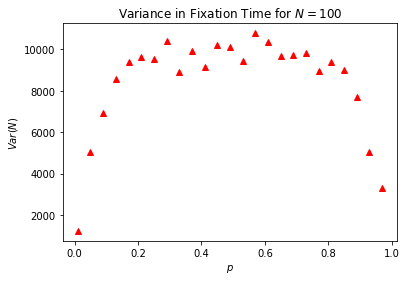

In [15]:
#Variances at N = 100
plt.plot(p, numpy.array(variances_N100).T, 'r^')
plt.title("Variance in Fixation Time for $N = 100$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

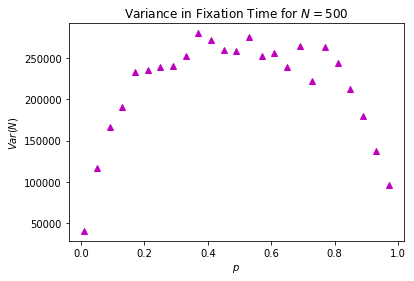

In [16]:
#Variances at N = 500
plt.plot(p, numpy.array(variances_N500).T, 'm^')
plt.title("Variance in Fixation Time for $N = 500$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

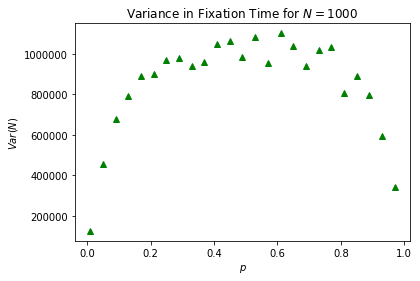

In [17]:
#Variances at N = 1000
plt.plot(p, numpy.array(variances_N1000).T, 'g^')
plt.title("Variance in Fixation Time for $N = 1000$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

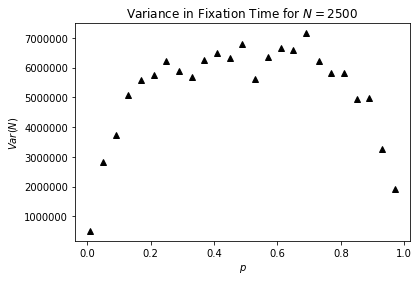

In [18]:
#Variances at N = 2500
plt.plot(p, numpy.array(variances_N2500).T, 'k^')
plt.title("Variance in Fixation Time for $N = 2500$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

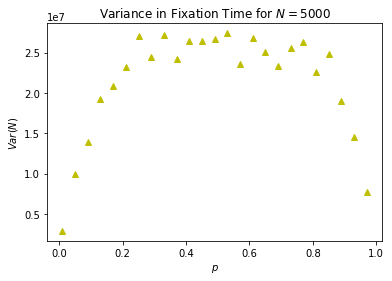

In [19]:
#Variances at N = 5000
plt.plot(p, numpy.array(variances_N5000).T, 'y^')
plt.title("Variance in Fixation Time for $N = 5000$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

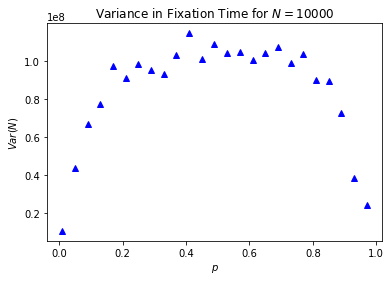

In [20]:
#Variances at N = 10000
plt.plot(p, numpy.array(variances_N10000).T, 'b^')
plt.title("Variance in Fixation Time for $N = 10000$")
plt.xlabel("$p$")
plt.ylabel("$Var(N)$")
plt.show()

### **Interpretation:** Expected fixation time as a function of starting allele frequency

Similar to variance, the expected fixation time for a given population as a function of the starting allele frequency is quadratic, but scaled on the y-axis by some constant $c$ (due to the linearity of expectation). The constant $c$ is a function of the population size.

Like the variance of fixation time, the expected fixation time has some uncertainty near $p = 0.5$. This is shown in the plots below, where the region (of the curve) that tends not to fit the Shannon entropy formula perfectly is around $p = 0.5$. Still, the uncertainty is not nearly as large as in the variance plots.

The solid lines represent the Shannon entropy (i.e. analytical results). The goal is to demonstrate the fit of the simulated data to the expected data.

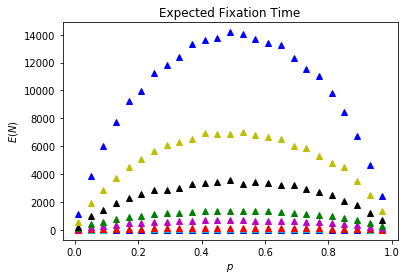

In [21]:
#Expectations
plt.plot(p, numpy.array(expectations_N10).T, 'b^', 
         p, numpy.array(expectations_N50).T, 'c^',
         p, numpy.array(expectations_N100).T, 'r^', 
         p, numpy.array(expectations_N500).T, 'm^',
         p, numpy.array(expectations_N1000).T, 'g^', 
         p, numpy.array(expectations_N2500).T, 'k^',
         p, numpy.array(expectations_N5000).T, 'y^',
         p, numpy.array(expectations_N10000).T, 'b^')
plt.title("Expected Fixation Time")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

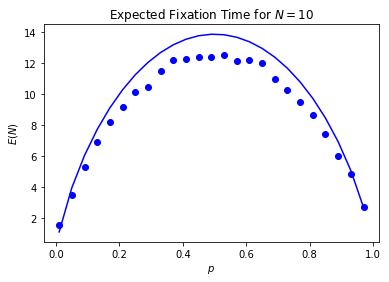

In [27]:
#Expectations at N = 10
plt.plot(p, numpy.array(expectations_N10).T, 'bo',
         p, exp_t_fix(p, 10), 'b')

plt.title("Expected Fixation Time for $N = 10$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

Due to the small population size $N = 10$, the simulated data does not fit the Shannon entropy formula exactly. In the following plots for population sizes ranging from $50$ to $10000$, the simulated data fits the Shannon entropy formula much better. As the population size increases, the more tightly the simulated data fits the Shannon entropy formula. So, for $N = 10000$, the simulated data fits nearly perfectly.

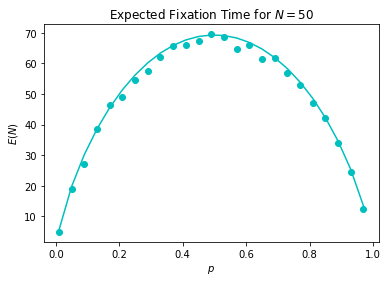

In [28]:
#Expectations at N = 50
plt.plot(p, numpy.array(expectations_N50).T, 'co',
         p, exp_t_fix(p, 50), 'c')
plt.title("Expected Fixation Time for $N = 50$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

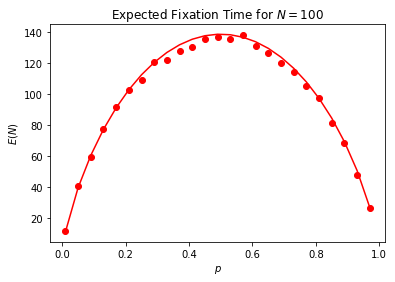

In [29]:
#Expectations at N = 100
plt.plot(p, numpy.array(expectations_N100).T, 'ro',
         p, exp_t_fix(p, 100), 'r')
plt.title("Expected Fixation Time for $N = 100$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

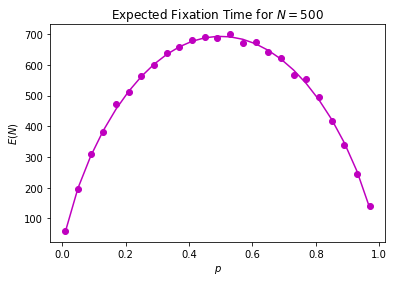

In [30]:
#Expectations at N = 500
plt.plot(p, numpy.array(expectations_N500).T, 'mo',
         p, exp_t_fix(p, 500), 'm')
plt.title("Expected Fixation Time for $N = 500$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

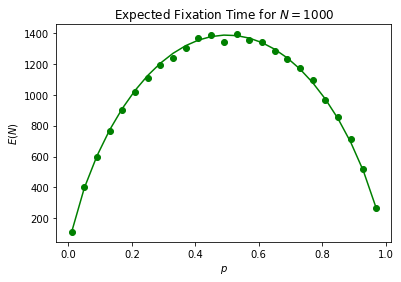

In [31]:
#Expectations at N = 1000
plt.plot(p, numpy.array(expectations_N1000).T, 'go',
         p, exp_t_fix(p, 1000), 'g')
plt.title("Expected Fixation Time for $N = 1000$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

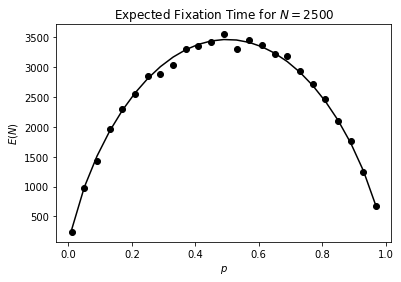

In [32]:
#Expectations at N = 2500
plt.plot(p, numpy.array(expectations_N2500).T, 'ko',
         p, exp_t_fix(p, 2500), 'k')
plt.title("Expected Fixation Time for $N = 2500$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

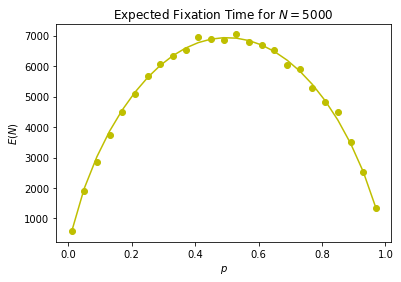

In [33]:
#Expectations at N = 5000
plt.plot(p, numpy.array(expectations_N5000).T, 'yo',
         p, exp_t_fix(p, 5000), 'y')
plt.title("Expected Fixation Time for $N = 5000$")
plt.xlabel("$p$")
plt.ylabel("$E(N)$")
plt.show()

## Part (b)

### **Interpretation:** Extinction frequency as a function of starting allele frequency

In [34]:
#Simulation Parameters
p = numpy.arange(0.01, 0.99, 0.04)
n_sim = 5000
t = 1000

In [35]:
#Simulation Function
def wf_sim_ext(n, p_init, n_sim):
    total_fix_count = 0
    times_to_extinction = []
    for s in range(n_sim):
        p = p_init
        fixated = False
        i = 1 #Generation
        while (fixated == False):
            curr_n_A = numpy.random.binomial(n, p)
            p = curr_n_A/n
            if (p == 1) & (fixated == False): 
                total_fix_count += 1
                fixated = True
                break
            
            #Save time to extinction
            if (p == 0) & (fixated == False): 
                times_to_extinction.append(i)
                total_fix_count += 1
                fixated = True
                break
            i += 1
    return(times_to_extinction, total_fix_count)

#Calculate expectations and variances
def wf_sim_exp_ext(curr_n, list_p, n_sim):
    expectations = []
    extinction_freq = []
    variances = []
    for curr_p in list_p:
        times_to_extinction, total_fix_count = wf_sim_ext(curr_n, curr_p, n_sim)
        expectations.append(numpy.mean(times_to_extinction))
        variances.append(numpy.var(times_to_extinction))
        
        #Calculate and save extinction frequency
        extinction_freq.append(len(times_to_extinction)/total_fix_count)
    return expectations, extinction_freq, variances

In [36]:
#Run N = 10 simulation
expectations_N10_ext, extinction_freq_N10, variances_N10_ext = wf_sim_exp_ext(curr_n = 10, list_p = p, n_sim = n_sim)

In [34]:
#Run N = 50 simulation
expectations_N50_ext, extinction_freq_N50, variances_N50_ext = wf_sim_exp_ext(curr_n = 50, list_p = p, n_sim = n_sim)

In [35]:
#Run N = 100 simulation
expectations_N100_ext, extinction_freq_N100, variances_N100_ext = wf_sim_exp_ext(curr_n = 100, list_p = p, n_sim = n_sim)

In [36]:
#Run N = 500 simulation
expectations_N500_ext, extinction_freq_N500, variances_N500_ext = wf_sim_exp_ext(curr_n = 500, list_p = p, n_sim = n_sim)

In [37]:
#Run N = 1000 simulation
expectations_N1000_ext, extinction_freq_N1000, variances_N1000_ext = wf_sim_exp_ext(curr_n = 1000, list_p = p, n_sim = n_sim)

In [38]:
#Run N = 1500 simulation
expectations_N1500_ext, extinction_freq_N1500, variances_N1500_ext = wf_sim_exp_ext(curr_n = 1500, list_p = p, n_sim = n_sim)

In [39]:
#Run N = 2500 simulation
expectations_N2500_ext, extinction_freq_N2500, variances_N2500_ext = wf_sim_exp_ext(curr_n = 2500, list_p = p, n_sim = n_sim)

In [40]:
#Run N = 5000 simulation
expectations_N5000_ext, extinction_freq_N5000, variances_N5000_ext = wf_sim_exp_ext(curr_n = 5000, list_p = p, n_sim = n_sim)

In [41]:
#Run N = 10000 simulation
expectations_N10000_ext, extinction_freq_N10000, variances_N10000_ext = wf_sim_exp_ext(curr_n = 10000, list_p = p, n_sim = n_sim)

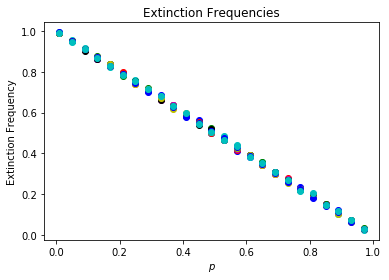

In [42]:
#Extinction Frequencies
plt.plot(p, numpy.array(extinction_freq_N10).T, 'bo',
         p, numpy.array(extinction_freq_N50).T, 'co',
         p, numpy.array(extinction_freq_N100).T, 'ro',
         p, numpy.array(extinction_freq_N500).T, 'mo',
         p, numpy.array(extinction_freq_N1000).T, 'go',
         p, numpy.array(extinction_freq_N1500).T, 'ko',
         p, numpy.array(extinction_freq_N2500).T, 'yo',
         p, numpy.array(extinction_freq_N5000).T, 'bo',
         p, numpy.array(extinction_freq_N10000).T, 'co')
plt.title("Extinction Frequencies")
plt.xlabel("$p$")
plt.ylabel("Extinction Frequency")
plt.show()

Analytically, the probability of extinction is

$$p_{ext} = 1 - p$$

where $p$ is the allelic frequency. This is consistent with the observed results above.

### **Interpretation:** Expected time to extinction as a function of starting allele frequency

There seems to be some ambiguities with the interpretation of "extinction": (1) extinction of either allele in the population, or (2) extinction of one of the alleles in the population.

For (1) extinction of either allele in the population, the expected times to extinction as a function of starting allele frequency and population size are demonstrated in the plots in part (a) of the question. In those plots, the simulated expected times to extinction fit the Shannon entropy curve, which is the analytical result.

For (2) extinction of one of the alleles in the population, the expected times to extinction as a function of starting allele frequency and population size are described in the following plots. However, there is not an analytical result discussed in class, so I cannot compare the simulated results with the analytical result.

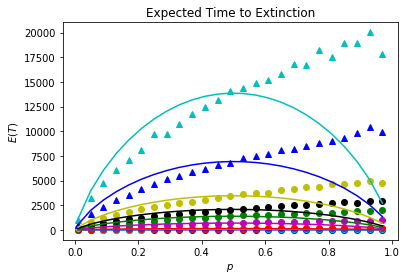

In [43]:
plt.plot(p, numpy.array(expectations_N10_ext).T, 'bo',
         p, numpy.array(expectations_N50_ext).T, 'co',
         p, numpy.array(expectations_N100_ext).T, 'ro',
         p, numpy.array(expectations_N500_ext).T, 'mo',
         p, numpy.array(expectations_N1000_ext).T, 'go',
         p, numpy.array(expectations_N1500_ext).T, 'ko',
         p, numpy.array(expectations_N2500_ext).T, 'yo',
         p, numpy.array(expectations_N5000_ext).T, 'b^',
         p, numpy.array(expectations_N10000_ext).T, 'c^',

         p, exp_t_fix(p, 10), 'b',
         p, exp_t_fix(p, 50), 'c',
         p, exp_t_fix(p, 100), 'r',
         p, exp_t_fix(p, 500), 'm',
         p, exp_t_fix(p, 1000), 'g',
         p, exp_t_fix(p, 1500), 'k',
         p, exp_t_fix(p, 2500), 'y',
         p, exp_t_fix(p, 5000), 'b',
         p, exp_t_fix(p, 10000), 'c')

plt.title("Expected Time to Extinction")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

As demonstrated in part (a), when plotting both the expected times to fixation and expected times to extinction, the curves closely resemble that of the Shannon entropy. However, when only plotting the expected times to extinction, the $E(T)$ for $p > 0.5$ do not fit the Shannon entropy curve. Intuitively, this is most likely because it would be faster for the allelic frequency of $A$ to fix (such that there are no more $a$ alleles) than for it to become extinct when there are more $A$ alleles than $a$ alleles.

To examine the expected time to extinction at each $N$ more closely, below are the individual plots for expected time to extinction at a given $N$.

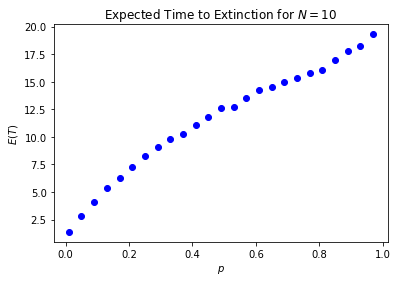

In [44]:
plt.plot(p, numpy.array(expectations_N10_ext).T, 'bo')
plt.title("Expected Time to Extinction for $N = 10$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

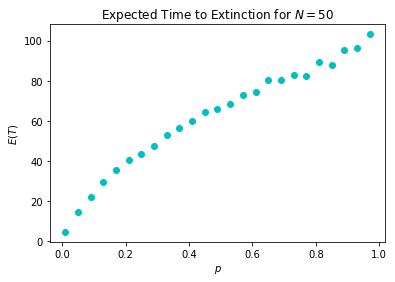

In [45]:
plt.plot(p, numpy.array(expectations_N50_ext).T, 'co')
plt.title("Expected Time to Extinction for $N = 50$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

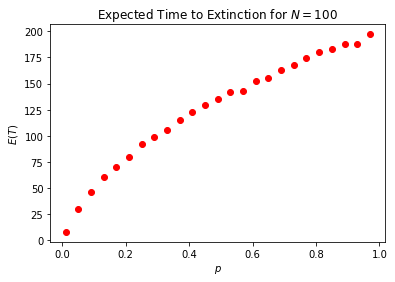

In [46]:
plt.plot(p, numpy.array(expectations_N100_ext).T, 'ro')
plt.title("Expected Time to Extinction for $N = 100$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

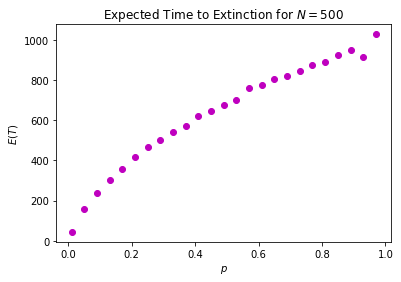

In [47]:
plt.plot(p, numpy.array(expectations_N500_ext).T, 'mo')
plt.title("Expected Time to Extinction for $N = 500$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

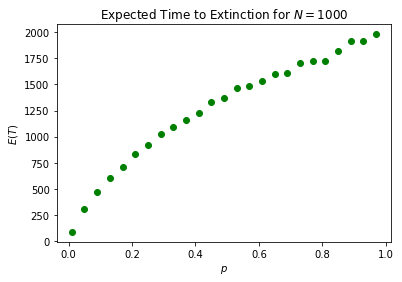

In [48]:
plt.plot(p, numpy.array(expectations_N1000_ext).T, 'go')
plt.title("Expected Time to Extinction for $N = 1000$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

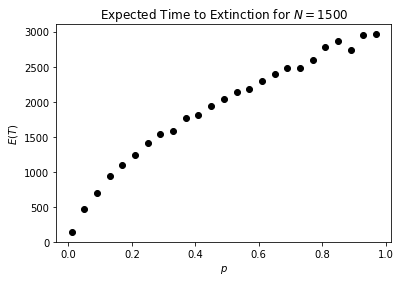

In [49]:
plt.plot(p, numpy.array(expectations_N1500_ext).T, 'ko')
plt.title("Expected Time to Extinction for $N = 1500$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

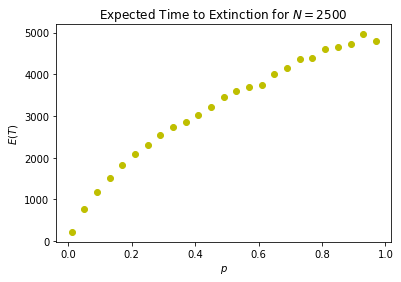

In [50]:
plt.plot(p, numpy.array(expectations_N2500_ext).T, 'yo')
plt.title("Expected Time to Extinction for $N = 2500$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

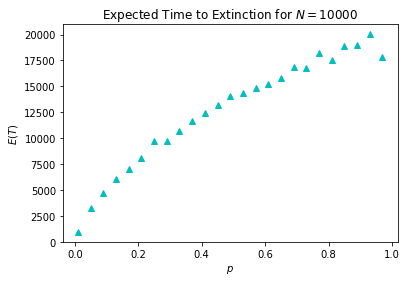

In [51]:
plt.plot(p, numpy.array(expectations_N10000_ext).T, 'c^')
plt.title("Expected Time to Extinction for $N = 10000$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

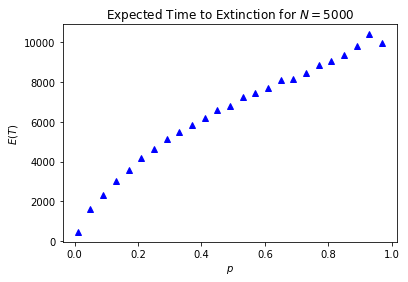

In [52]:
plt.plot(p, numpy.array(expectations_N5000_ext).T, 'b^')
plt.title("Expected Time to Extinction for $N = 5000$")
plt.xlabel("$p$")
plt.ylabel("$E(T)$")
plt.show()

## Question 3

### Part (a)

The average fitness $\bar{W}$ is
$$\bar{W} = 2p(1 - p)(1 + s) + (1 - p)^2$$

The equilibrium frequency is when $\Delta p = 0$,
$$\Delta p = p^2 \frac{W_{AA}}{\bar{W}} + p(1 - p) \frac{W_{Aa}}{\bar{W}} - p = 0$$

So, to solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{(1 - \widetilde{p})(1 + s)}{2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2}$$

Step 4
$$2\widetilde{p}(1 - \widetilde{p})(1 + s) + (1 - \widetilde{p})^2 = (1 - \widetilde{p})(1 + s)$$

Step 5
$$2\widetilde{p}(1 + s) + (1 - \widetilde{p}) = 1 + s$$

Step 6
$$2\widetilde{p} + 2\widetilde{p}s - \widetilde{p} = s$$

Step 7
$$\widetilde{p}(1 + 2s) = s$$

Step 8
$$\widetilde{p} = \frac{s}{1 + 2s}$$

#### Final Solution:

$$\widetilde{p} = 0 \quad\text{ or }\quad \widetilde{p} = \frac{s}{1 + 2s}$$

### Part (b)

The average fitness $\bar{W}$ is
$$\bar{W} = p^2(1 + s) + 2p(1 - p)(1 - s^2) + (1 - p)^2$$

To solve for $\widetilde{p}$, start with (Step 1)
$$\Delta p = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2} - \widetilde{p} = 0$$

Step 2
$$\widetilde{p} = \frac{\widetilde{p}^2 (1 + s) + \widetilde{p}(1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 3
$$1 = \frac{\widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)}{\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2}$$

Step 4
$$\widetilde{p}^2(1 + s) + 2\widetilde{p}(1 - \widetilde{p})(1 - s^2) + (1 - \widetilde{p})^2 = \widetilde{p} (1 + s) + (1 - \widetilde{p}) (1 - s^2)$$

Step 5
$$(1 + s)(\widetilde{p}^2 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 6
$$-(1 + s)\widetilde{p}(1 - \widetilde{p}) + (1 - \widetilde{p})^2 = (1 - \widetilde{p}) (1 - s^2)(1 - 2\widetilde{p})$$

Step 7
$$-(1 + s)\widetilde{p} + (1 - \widetilde{p}) = (1 - s^2)(1 - 2\widetilde{p})$$

Step 8
$$-\widetilde{p} - \widetilde{p}s + 1 - \widetilde{p} = 1 - 2\widetilde{p} - s^2 + 2\widetilde{p}s^2$$

Step 9
$$-\widetilde{p}s = -s^2 + 2\widetilde{p}s^2$$

Step 10
$$-\widetilde{p} - 2\widetilde{p}s = -s$$

Step 11
$$\widetilde{p}(-1 - 2s) = -s$$

Step 12
$$\widetilde{p} = \frac{s}{1 + 2s}$$

#### Final Solution:

$$\widetilde{p} = 0 \quad\text{ or }\quad \widetilde{p} = 1 \text{ (and } s+1 \neq 0 \text{)} \quad\text{ or }\quad \widetilde{p} = \frac{s}{1 + 2s}$$


### Part (c)

In [20]:
def wf_sim_sel(p_init, n_sim, t, W_AA, W_Aa, W_aa):
    sim_delta_p = []
    for p in p_init:
        for s in range(n_sim):
            trace_delta_p = []
            for i in range(t):
                
                #Calculate mean fitness w
                mean_w = (p**2)*W_AA + 2*p*(1-p)*W_Aa + ((1 - p)**2)*W_aa
                
                #Calculate delta_P
                p += (p**2)*(W_AA/mean_w) + p*(1-p)*(W_Aa/mean_w) - p
                
                #Save delta_P
                trace_delta_p.append(p)
            
            #Save change in delta_P
            sim_delta_p.append(trace_delta_p)
    return sim_delta_p

#### Overdominance




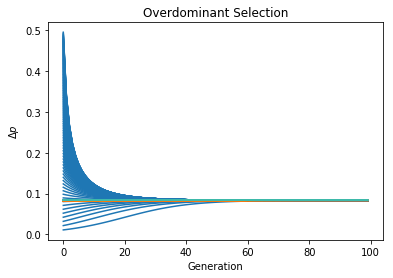

In [29]:
p_init = numpy.arange(0.01, 0.99, 0.01)

sim_delta_p = wf_sim_sel(p_init = p_init, n_sim = 10, t = 100, W_AA = 0, W_Aa = 1.1, W_aa = 1) 

#Plot allele populations over time
plt.plot(numpy.array(sim_delta_p).T)
plt.title("Overdominant Selection")
plt.xlabel("Generation")
plt.ylabel("$\Delta p$")
plt.show()

In [30]:
numpy.mean(sim_delta_p)

0.08446240084078391

In the case of overdominant selection, $\Delta p$ quickly converges to equilibrium, which is $$\widetilde{p} = \frac{s}{1 + 2s} = \frac{0.1}{1 + 2*0.1} \approx 0.08$$
regardless of the starting allele frequency. This behavior of $\Delta p$ implies that homozygous dominant individuals are less "fit" than heterozygous or homozygous recessive individuals, which is supported by the fitness of $W_{AA} = 0$, $W_{Aa} = 1.1$, and $W_{aa} = 1$.

#### Underdominance

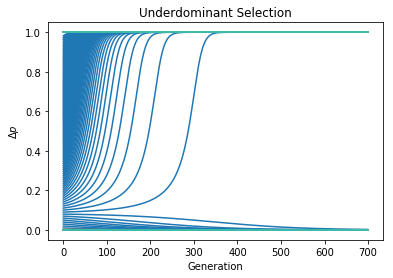

In [35]:
p_init = numpy.arange(0.01, 0.99, 0.01)

sim_delta_p = wf_sim_sel(p_init = p_init, n_sim = 10, t = 700, W_AA = 1.1, W_Aa = 0.99, W_aa = 1) 

#Plot allele populations over time
plt.plot(numpy.array(sim_delta_p).T)
plt.title("Underdominant Selection")
plt.xlabel("Generation")
plt.ylabel("$\Delta p$")
plt.show()

In [36]:
numpy.mean(sim_delta_p)

0.915559423844765

In the case of underdominant selection, $\Delta p$ slowly converges to $0$ or $1$, depending on the starting alelle frequency. At small $\Delta p$ (less than approximately $0.1$), $\Delta p$ converges to $0$; otherwise, $\Delta p$ converges to $1$.

For the populations that converge to $1$, there is a relatively sharp increase from approximately $\Delta p < 0.3$ to $\Delta p > 0.8$, which implies that heterozygous individuals are less "fit" than homozygous dominant/recessive individuals. 

This is supported by the fitness of $W_{AA} = 1.1$, $W_{Aa} = 0.99$, and $W_{aa} = 1$.

## Question 4

### Part (a)

Consider $\mu(1 - p)$ to be the probability of choosing an a allele and mutating it, and $\mu p$ to be the probability of choosing an A allele and mutating it.

Let $p(1+s)$ be the selection propogated from the previous generation.

This gives us
$$p' = p(1 + s) + \mu(1 - p) - \mu p$$

Because $p' = p$ at equilibrium,
$$p = p(1 + s) + \mu(1 - p) - \mu p$$

Step 1
$$p = p + ps + \mu - 2p\mu$$

Step 2
$$0 = p(s - 2\mu) + \mu$$

Step 3
$$p = \frac{\mu}{-s + 2\mu}$$


Now, we simulate the equilibrium of a population of $100$ with two alleles, $\mu = 0.001$, and $s = 0.01$ as follows.

In [56]:
#Simulation Function
def wf_sim_mut(n, p_init, n_sim, t, mu, w):
    simulations = []
    equilibrium = []
    for s in range(n_sim):
        total_n_A = []
        fixated = False
        p = p_init
        for i in range(t):
            
            #Draw from binomial the new population of A alleles
            curr_n_A = numpy.random.binomial(n, p)
            
            #Draw from the population of a alleles to mutate, draw from the new population of A alleles to mutate, and subtract
            curr_n_A = curr_n_A + numpy.random.binomial(n - curr_n_A, mu) - numpy.random.binomial(curr_n_A, mu) 
            
            #Save final population of A alleles
            total_n_A.append(curr_n_A)
            
            #Calculate new p
            p = curr_n_A/n
        
        #Save equilibrium population
        if (curr_n_A > 0) & (curr_n_A < n): equilibrium.append(curr_n_A)
        
        #Save change in population of A alleles
        simulations.append(total_n_A)
    return(simulations, equilibrium)


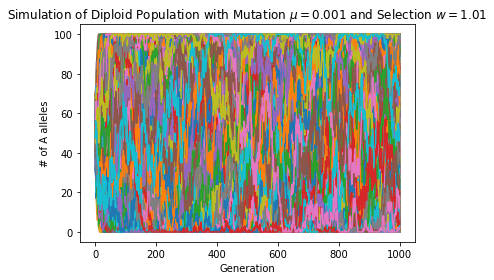

In [57]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 100, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.001$ and Selection $w = 1.01$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [58]:
numpy.mean(equilibrium)

51.65231259968102

### Part (b)

Next, we simulate how the equilibrium changes if the population is $N = 10000$ as follows.

As a sanity check, when there is no selection of fitness (i.e. $s = 0$) but there is a chance of mutation $\mu > 0$, there should only be rare events of fixation/extinction.

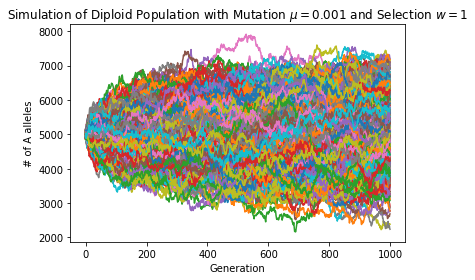

In [59]:
#Simulation
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.001$ and Selection $w = 1$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [60]:
numpy.mean(equilibrium)

5013.479

As another sanity check, when there is no mutation rate $\mu = 0$ and there is selection, the allelic frequency of $A$ should quickly fix or become extinct.

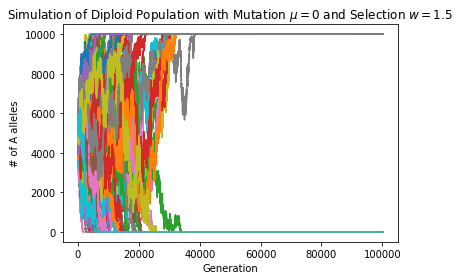

In [61]:
#Run mu = 0, w = 1.5
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 100, t = 100000, mu = 0, w = 1.5)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0$ and Selection $w = 1.5$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [62]:
numpy.mean(equilibrium)

/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/michellemli/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

Back to the question of how equilibrium changes When $N = 10000$, $\mu = 0.001$, and $w = 1.01$: Fixation/extinction events should be rare.

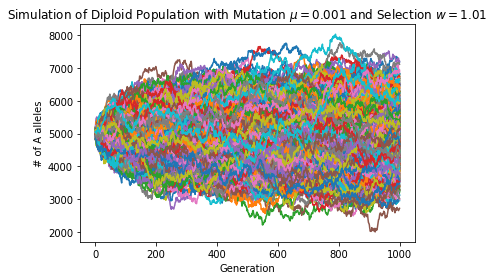

In [63]:
#Run mu = 0.001, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.001$ and Selection $w = 1.01$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [64]:
numpy.mean(equilibrium)

4995.522

To simulate how the equilibrium changes with mutation rate $\mu$ and fitness $w$:

The mutation rate helps determine how much the proportion of $A$ alleles fluctuates over $t$ generations. The higher the mutation rate (i.e. $\mu = 0.5$), the more quickly the population fluctuates.

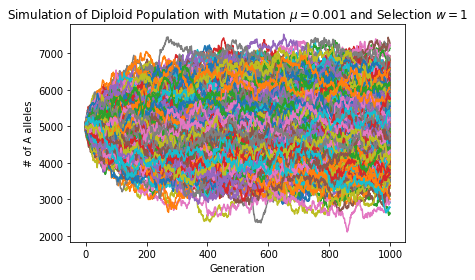

In [65]:
#Run mu = 0.001, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.001, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.001$ and Selection $w = 1$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [66]:
numpy.mean(equilibrium)

5042.468

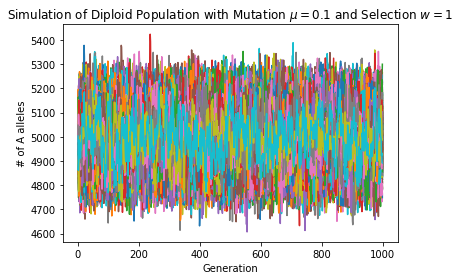

In [67]:
#Run mu = 0.1, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.1, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.1$ and Selection $w = 1$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [68]:
numpy.mean(equilibrium)

4999.256

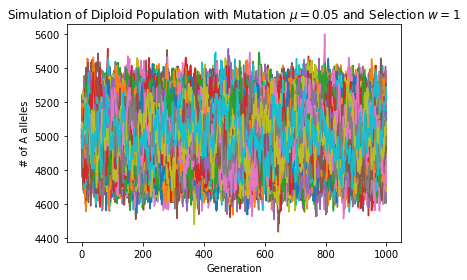

In [69]:
#Run mu = 0.05, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.05, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.05$ and Selection $w = 1$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [70]:
numpy.mean(equilibrium)

5004.187

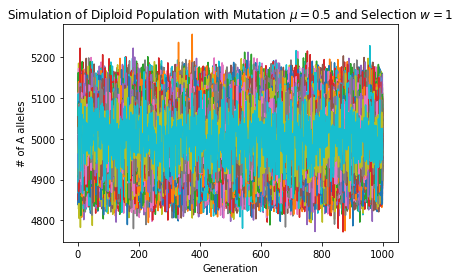

In [71]:
#Run mu = 0.5, w = 1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.5, w = 1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.5$ and Selection $w = 1$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [72]:
numpy.mean(equilibrium)

5000.253

The selection $s$ helps determine the rate at which the proportion of $A$ alleles increase (or decrease) across $t$ generations. The higher the selection $s$, the more quickly the allele frequencies reach $N$ or $0$.

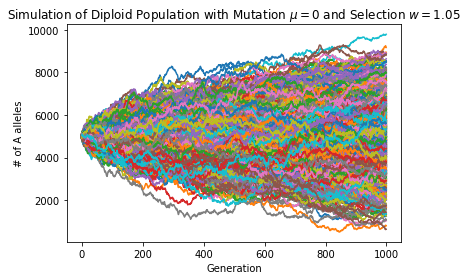

In [73]:
#Run mu = 0, w = 1.05
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0, w = 1.05)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0$ and Selection $w = 1.05$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [74]:
numpy.mean(equilibrium)

5019.805

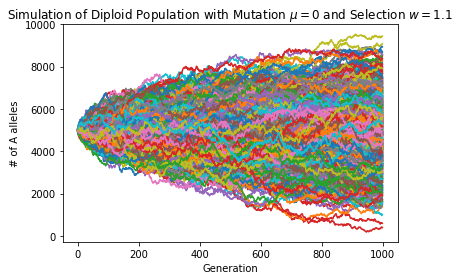

In [75]:
#Run mu = 0, w = 1.1
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0, w = 1.1)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0$ and Selection $w = 1.1$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [76]:
numpy.mean(equilibrium)

4974.259

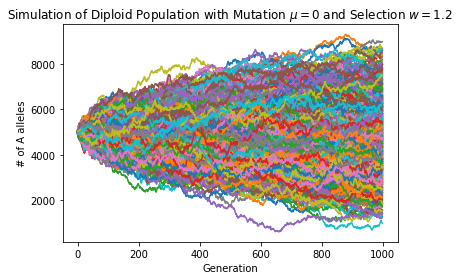

In [77]:
#Run mu = 0, w = 1.2
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0, w = 1.2)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0$ and Selection $w = 1.2$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [78]:
numpy.mean(equilibrium)

4927.044

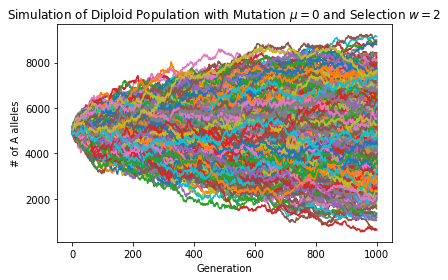

In [79]:
#Run mu = 0, w = 2
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0, w = 2)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0$ and Selection $w = 2$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [80]:
numpy.mean(equilibrium)

4984.194

Now, varying mutation rate and selection, we see that when the selection $s$ is less than mutation rate $\mu$, the overall population would fluctuate more around the equilibrium (because there is a higher chance of one allele mutating to the other allele).

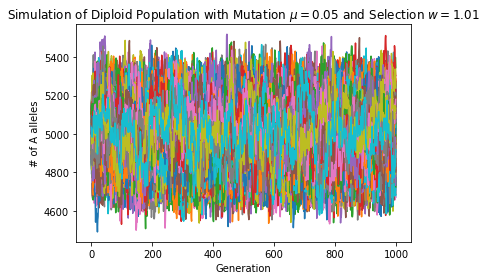

In [81]:
#Run mu = 0.05, w = 1.01
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.05, w = 1.01)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.05$ and Selection $w = 1.01$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [82]:
numpy.mean(equilibrium)

5003.964

Also, when the selection $s$ is greater than the mutation rate $\mu > 0$, the population of one allele $A$ may increase (or decrease) quickly, but is then likely to mutate to the other allele $a$, which would result in a decrease (or increase) in the allelic population of $A$.

In the following example, this is most clear at the very top of the plot (where the number of alleles $\approx 6500$) and the bottom (where the number of alleles $\approx 3500$). There is a fast increase of in one type of allele, but the mutation rate $\mu > 0$ causes the "sharp turn" such that fixation does not happen.

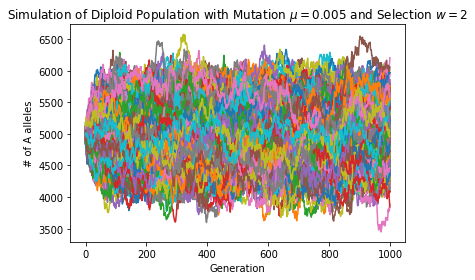

In [83]:
#Run mu = 0.005, w = 2
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 0.005, w = 2)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 0.005$ and Selection $w = 2$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [84]:
numpy.mean(equilibrium)

5002.477

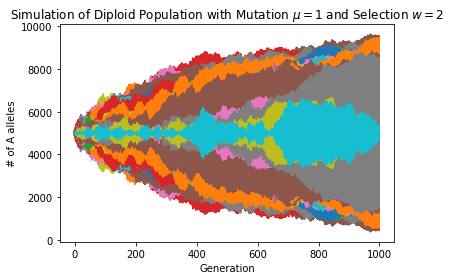

In [85]:
#Run mu = 1, w = 2
simulations, equilibrium = wf_sim_mut(n = 10000, p_init = 0.5, n_sim = 1000, t = 1000, mu = 1, w = 2)

#Plot allele populations over time
plt.plot(numpy.array(simulations).T)
plt.title("Simulation of Diploid Population with Mutation $\mu = 1$ and Selection $w = 2$")
plt.xlabel("Generation")
plt.ylabel("# of A alleles")
plt.show()

Based on the simulation, the mean equilibrium population is calculated as the following

In [86]:
numpy.mean(equilibrium)

4968.795

## Question 5

### Part (a)

Let $q = (1 - \mu)^N$ be the probability that an entire population $N$ does not have a mutation.

Let $p = 1 - q = 1 - (1 - \mu)^N$ be the probability that at least one individual in a population of $N$ has a mutation.

The probability that a rare allele A* appears in the population for the first time after the $n$th generation is
$$P(X = k) = (1 - p)^{(k-1)}p$$
This follows a **geometric distribution**

The probability distribution of the frequency of A\* when it first appears is a **poisson distribution** (zero-truncated) with mean 
$$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

*(See the following simulations for more details.)*

In [108]:
k_gen = numpy.arange(1, 1000, 10)

def sim_time_to_appear(n, mu, w):
    p = 0
    t_to_appear = 0
    while (p == 0):
        p = p*w
        
        #Draw new population of A alleles
        curr_n_A = numpy.random.binomial(n, p)
        
        #Draw from new population of a alleles to mutate, and add
        curr_n_A += numpy.random.binomial(n - curr_n_A, mu)
        
        #Calculate new p
        p = curr_n_A/n
        
        #Keep track of generations until first appearance
        t_to_appear += 1
    return p*n, t_to_appear

def sim_appear(n_sim, n, mu, w, k_gen):
    p_to_appear = []
    times_to_appear = []
    frequencies = [] #probability that a rare allele A appears in the kth generation
    for k in k_gen:
        trace = []
        for s in range(n_sim):
            
            #Simulate new p and corresponding time to first appearance
            new_p, new_t = sim_time_to_appear(n, mu, w)
            
            #Save new p and time to first appearance
            p_to_appear.append(new_p)
            times_to_appear.append(new_t)
            
            #Save 1 if time to appearance is the same as the given k, 0 otherwise
            if (new_t == k): trace.append(1)
            else: trace.append(0)
        
        #Calculate and save probability that a rare allele A* appears in the population for the first time at the kth generation
        freq = numpy.sum(trace)/len(trace)
        frequencies.append(freq)
    return p_to_appear, times_to_appear, frequencies


In [73]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 1000, mu = 0.01, w = 1.01, n_sim = 1000, k_gen = k_gen)

The probability that a rare allele A* appears in the population for the first time at the $n$th generation is

In [74]:
numpy.mean(frequencies)

0.01

The distribution of times until first appearance of rare allele A* is geometric.

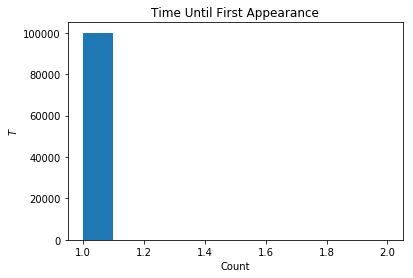

In [75]:
plt.hist(numpy.array(times_to_appear).T)
plt.title("Time Until First Appearance")
plt.xlabel("Count")
plt.ylabel("$T$")
plt.show()

The expected number of generations for allele A* to emerge is calculated as follows. This is consistent with 
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$. The discrepancy between the simulated mean and the analytical mean may be due to population size.

In [76]:
numpy.mean(times_to_appear)

1.0001

The distribution of frequencies of allele A* at first appearance is poisson (zero-truncated).

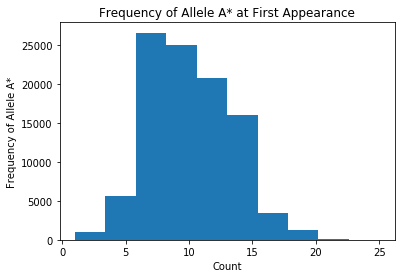

In [77]:
plt.hist(numpy.array(p_to_appear).T)
plt.title("Frequency of Allele A* at First Appearance")
plt.xlabel("Count")
plt.ylabel("Frequency of Allele A*")
plt.show()

The average frequency is calculated as follows. $$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

In [78]:
numpy.mean(p_to_appear)

10.0089

In [80]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 10000, mu = 0.01, w = 1.01, n_sim = 1000, k_gen = k_gen)

The probability that a rare allele A* appears in the population for the first time at the $n$th generation is

In [81]:
numpy.mean(frequencies)

0.01

The distribution of times until first appearance of rare allele A* is geometric.

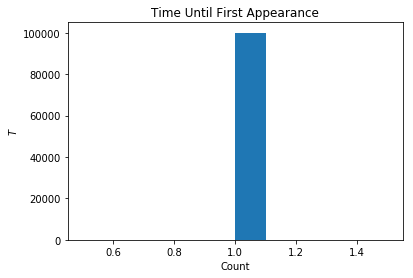

In [82]:
plt.hist(numpy.array(times_to_appear).T)
plt.title("Time Until First Appearance")
plt.xlabel("Count")
plt.ylabel("$T$")
plt.show()

The expected number of generations for allele A* to emerge is calculated as follows. This is consistent with 
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$

In [83]:
numpy.mean(times_to_appear)

1.0

The distribution of frequencies of allele A* at first appearance is poisson (zero-truncated).

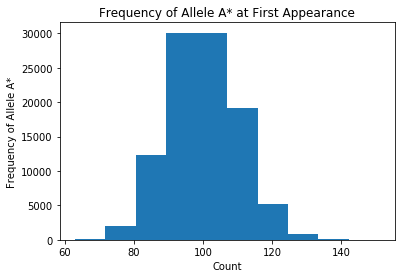

In [84]:
plt.hist(numpy.array(p_to_appear).T)
plt.title("Frequency of Allele A* at First Appearance")
plt.xlabel("Count")
plt.ylabel("Frequency of Allele A*")
plt.show()

The average frequency is calculated as follows. This is consistent with $$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

In [86]:
numpy.mean(p_to_appear)

99.98157

In [88]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 100, mu = 0.1, w = 1.01, n_sim = 1000, k_gen = k_gen)

The probability that a rare allele A* appears in the population for the first time at the $n$th generation is

In [89]:
numpy.mean(frequencies)

0.01

The distribution of times until first appearance of rare allele A* is geometric.

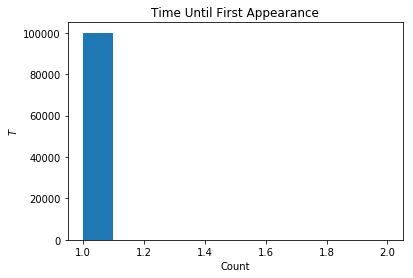

In [90]:
plt.hist(numpy.array(times_to_appear).T)
plt.title("Time Until First Appearance")
plt.xlabel("Count")
plt.ylabel("$T$")
plt.show()

The expected number of generations for allele A* to emerge is calculated as follows. This is consistent with 
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$

In [91]:
numpy.mean(times_to_appear)

1.00002

The distribution of frequencies of allele A* at first appearance is poisson (zero-truncated).

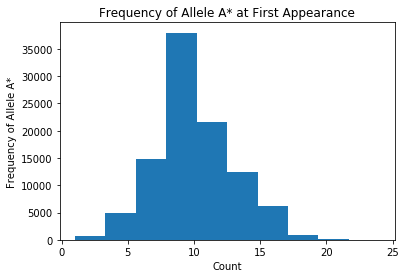

In [92]:
plt.hist(numpy.array(p_to_appear).T)
plt.title("Frequency of Allele A* at First Appearance")
plt.xlabel("Count")
plt.ylabel("Frequency of Allele A*")
plt.show()

The average frequency is calculated as follows. This is consistent with $$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

In [93]:
numpy.mean(p_to_appear)

9.99616

In [94]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 1000, mu = 0.1, w = 1.01, n_sim = 1000, k_gen = k_gen)

The probability that a rare allele A* appears in the population for the first time at the $n$th generation is

In [95]:
numpy.mean(frequencies)

0.01

The distribution of times until first appearance of rare allele A* is geometric.

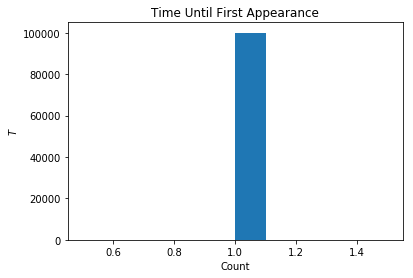

In [96]:
plt.hist(numpy.array(times_to_appear).T)
plt.title("Time Until First Appearance")
plt.xlabel("Count")
plt.ylabel("$T$")
plt.show()

The expected number of generations for allele A* to emerge is calculated as follows. This is consistent with 
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$

In [97]:
numpy.mean(times_to_appear)

1.0

The distribution of frequencies of allele A* at first appearance is poisson (zero-truncated).

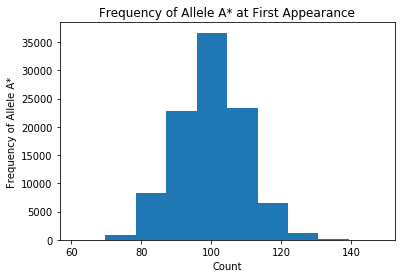

In [98]:
plt.hist(numpy.array(p_to_appear).T)
plt.title("Frequency of Allele A* at First Appearance")
plt.xlabel("Count")
plt.ylabel("Frequency of Allele A*")
plt.show()

The average frequency is calculated as follows. This is consistent with $$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

In [99]:
numpy.mean(p_to_appear)

99.99976

In [101]:
p_to_appear, times_to_appear, frequencies = sim_appear(n = 10000, mu = 0.1, w = 1.01, n_sim = 1000, k_gen = k_gen)

The probability that a rare allele A* appears in the population for the first time at the $n$th generation is

In [102]:
numpy.mean(frequencies)

0.01

The distribution of times until first appearance of rare allele A* is geometric.

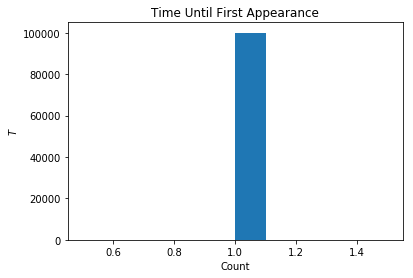

In [103]:
plt.hist(numpy.array(times_to_appear).T)
plt.title("Time Until First Appearance")
plt.xlabel("Count")
plt.ylabel("$T$")
plt.show()

The expected number of generations for allele A* to emerge is calculated as follows. This is consistent with 
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$

In [104]:
numpy.mean(times_to_appear)

1.0

The distribution of frequencies of allele A* at first appearance is poisson (zero-truncated).

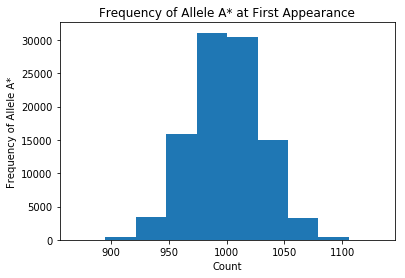

In [105]:
plt.hist(numpy.array(p_to_appear).T)
plt.title("Frequency of Allele A* at First Appearance")
plt.xlabel("Count")
plt.ylabel("Frequency of Allele A*")
plt.show()

The average frequency is calculated as follows. This is consistent with $$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

In [106]:
numpy.mean(p_to_appear)

999.97024

### Part (b)

As demonstrated in part (a), the expected number of generations for allele A* to emerge is
$$E(X) = \frac{1}{p}$$
where $p = 1 - (1 - \mu)^N$

Also, the average frequency is $$E[X] = \frac{\lambda}{1 - e^{-\lambda}}$$ 
where $X$ is the number of rare A\* alleles that appears and $\lambda = \mu N$.

Now, assuming that there is no fitness advantage (i.e. $s = 0$), the probability that A* fixes after the first time it appears in the population can be demonstrated in the simulations below:

The simulations show the resulting proportion of allele A* in the population of $N$. Populations with small mutation rates (i.e. $\mu = 0.00001$) and no selection (i.e. $s = 0$) tend to result in fixation at larger $N$.

In [79]:
#Simulation Function
def wf_sim_emerg(n, n_sim, w, mu):
    simulations = []
    times_to_fixation = [] #Reach N
    total_fix = [] #Reach 0 or N
    p_inits = []
    
    exp_t_emerge = 1/(1 - (1 - mu)**n)
    
    for s in range(n_sim):
        total_n_A = []
        fixated = False
        p = 0
        i = 1
        while (p <= 0):
            p = numpy.random.poisson(mu*n)/n
        while (fixated == False):
            #Save the initial allelic frequencies from zero truncated poisson
            p_inits.append(p)
            
            p = p*w
            
            #Draw new population of A alleles
            if (p > 1): curr_n_A = numpy.random.binomial(n, 1)
            else: curr_n_A = numpy.random.binomial(n, p)

            #Draw from new population of a alleles to mutate, and add
            curr_n_A += numpy.random.binomial(n - curr_n_A, mu)

            #Calculate new p
            p = curr_n_A/n
            
            total_n_A.append(curr_n_A)
            
            #Save time to fixation
            if (p == 1) and (fixated == False): 
                times_to_fixation.append(i)
                total_fix.append(i)
                
                fixated = True
                break
            if (p == 0) and (fixated == False): 
                total_fix.append(i)
                fixated = True
                break
            i += 1
        simulations.append(total_n_A)
    return simulations, times_to_fixation, total_fix, exp_t_emerge, numpy.mean(p_inits)

In [132]:
n = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

prob_fix = []
p_inits = []
for n_pop in n:    
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 100, w = 1, mu = 0.00001)
    if (len(total_fix) != 0): 
        prob_fix.append(len(times_to_fixation)/len(total_fix))
        p_inits.append(p_0)

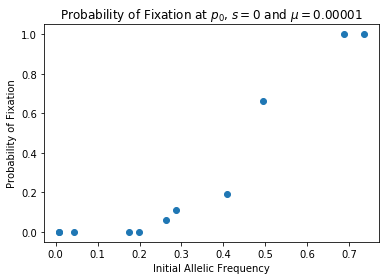

In [133]:
plt.plot(numpy.array(p_inits).T, numpy.array(prob_fix).T, 'o')
plt.title("Probability of Fixation at $p_0$, $s = 0$ and $\mu = 0.00001$")

plt.xlabel("Initial Allelic Frequency")
plt.ylabel("Probability of Fixation")
plt.show()

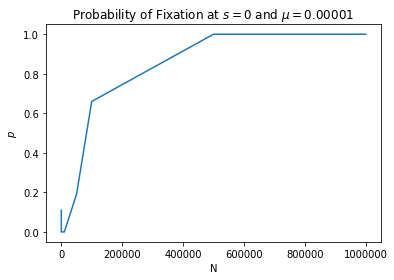

In [134]:
plt.plot(n, numpy.array(prob_fix).T)
plt.title("Probability of Fixation at $s = 0$ and $\mu = 0.00001$")

plt.xlabel("N")
plt.ylabel("$p$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [135]:
exp_t_emerge + numpy.mean(times_to_fixation)

381741.3900453997

In [ ]:
n = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

prob_fix = []
p_inits = []
for n_pop in n:    
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.00001)
    if (len(total_fix) != 0): 
        prob_fix.append(len(times_to_fixation)/len(total_fix))
        p_inits.append(p_0)

The probability that A* fixes after the first time it appears in the population as a function of initial allelic frequency:

In [ ]:
plt.plot(numpy.array(p_inits).T, numpy.array(prob_fix).T, 'o')
plt.title("Probability of Fixation at $p_0$, $s = 0$ and $\mu = 0.00001$")

plt.xlabel("Initial Allelic Frequency")
plt.ylabel("Probability of Fixation")
plt.show()

In [ ]:
plt.plot(n, numpy.array(prob_fix).T)
plt.title("Probability of Fixation at $s = 0$ and $\mu = 0.00001$")

plt.xlabel("N")
plt.ylabel("$p$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [ ]:
exp_t_emerge + numpy.mean(times_to_fixation)

In [136]:
n = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]

prob_fix = []
p_inits = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.001)
    if (len(total_fix) != 0): 
        prob_fix.append(len(times_to_fixation)/len(total_fix))
        p_inits.append(p_0)

The probability that A* fixes after the first time it appears in the population as a function of initial allelic frequency:

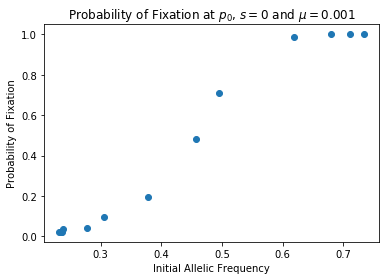

In [137]:
plt.plot(numpy.array(p_inits).T, numpy.array(prob_fix).T, 'o')
plt.title("Probability of Fixation at $p_0$, $s = 0$ and $\mu = 0.001$")

plt.xlabel("Initial Allelic Frequency")
plt.ylabel("Probability of Fixation")
plt.show()

The probability that A* fixes after the first time it appears in the population as a function of population size:

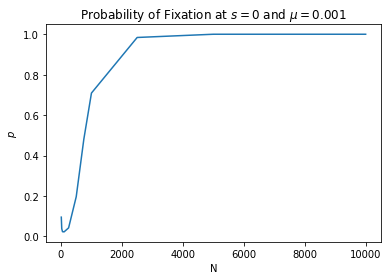

In [138]:
plt.plot(n, numpy.array(prob_fix).T)
plt.title("Probability of Fixation at $s = 0$ and $\mu = 0.001$")

plt.xlabel("N")
plt.ylabel("$p$")
plt.show()

At small population size $N$ (in this case $N \approx 1000$), the probability of fixation is less than $0.2$, according to the plot above. When the population size is sufficiently large (in this case $N \approx 6000$), then the probability of fixation is $1$.

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [139]:
exp_t_emerge + numpy.mean(times_to_fixation)

3746.148045175387

In [140]:
n = [1, 5, 10, 25, 50, 75, 100, 250, 500, 750, 1000]

prob_fix = []
p_inits = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.01)
    if (len(total_fix) != 0): 
        prob_fix.append(len(times_to_fixation)/len(total_fix))
        p_inits.append(p_0)

The probability that A* fixes after the first time it appears in the population as a function of initial allelic frequency:

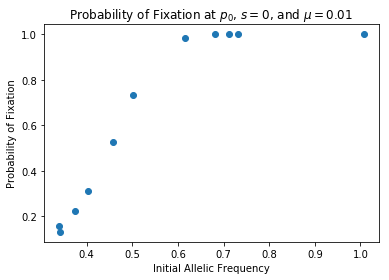

In [141]:
plt.plot(numpy.array(p_inits).T, numpy.array(prob_fix).T, 'o')
plt.title("Probability of Fixation at $p_0$, $s = 0$, and $\mu = 0.01$")

plt.xlabel("Initial Allelic Frequency")
plt.ylabel("Probability of Fixation")
plt.show()

The probability that A* fixes after the first time it appears in the population as a function of population size:

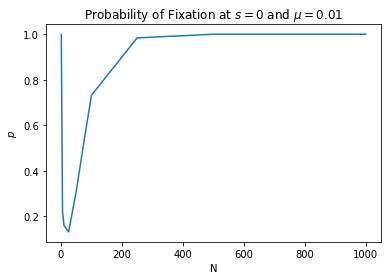

In [142]:
plt.plot(n, numpy.array(prob_fix).T)
plt.title("Probability of Fixation at $s = 0$ and $\mu = 0.01$")

plt.xlabel("N")
plt.ylabel("$p$")
plt.show()

At small population size $N$ (in this case $N \approx 100$), the probability of fixation is less than $0.2$, according to the plot above. When $N = 0$, it does not matter whether the probability of fixation is $0$ or $1$. When the population size is sufficiently large, in this case $N \approx 600$, then the probability of fixation is $1$.

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [143]:
exp_t_emerge + numpy.mean(times_to_fixation)

372.7680431731112

In [144]:
n = [1, 5, 10, 15, 20, 25, 50, 75, 100]

prob_fix = []
p_inits = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1, mu = 0.1)
    if (len(total_fix) != 0): 
        prob_fix.append(len(times_to_fixation)/len(total_fix))
        p_inits.append(p_0)

The probability that A* fixes after the first time it appears in the population as a function of initial allelic frequency:

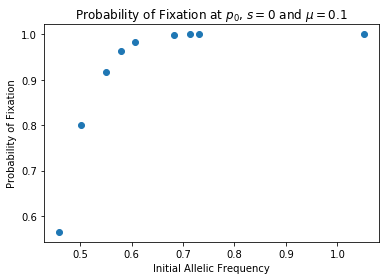

In [145]:
plt.plot(numpy.array(p_inits).T, numpy.array(prob_fix).T, 'o')
plt.title("Probability of Fixation at $p_0$, $s = 0$ and $\mu = 0.1$")

plt.xlabel("Initial Allelic Frequency")
plt.ylabel("Probability of Fixation")
plt.show()

The probability that A* fixes after the first time it appears in the population as a function of population size:

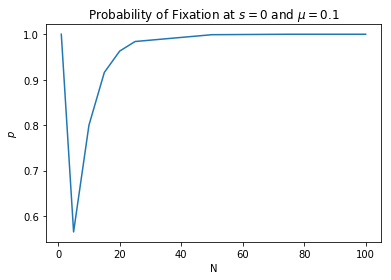

In [146]:
plt.plot(n, numpy.array(prob_fix).T)
plt.title("Probability of Fixation at $s = 0$ and $\mu = 0.1$")
plt.xlabel("N")
plt.ylabel("$p$")
plt.show()

At small population size $N$ (in this case $N \approx 10$), the probability of fixation is less than $0.6$, according to the plot above. When $N = 0$, it does not matter whether the probability of fixation is $0$ or $1$. Because $\mu = 0.1$, even at $N \approx 60$, the probability of fixation is $1$.

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [147]:
exp_t_emerge + numpy.mean(times_to_fixation)

34.24302656210442

In [156]:
n = numpy.arange(1, 40)

prob_fix = []
p_inits = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 10000, w = 1, mu = 0.5)
    if (len(total_fix) != 0): 
        prob_fix.append(len(times_to_fixation)/len(total_fix))
        p_inits.append(p_0)

The probability that A* fixes after the first time it appears in the population as a function of initial allelic frequency:

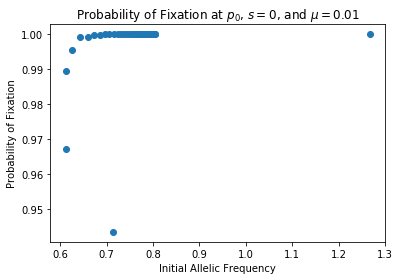

In [157]:
plt.plot(numpy.array(p_inits).T, numpy.array(prob_fix).T, 'o')
plt.title("Probability of Fixation at $p_0$, $s = 0$, and $\mu = 0.01$")

plt.xlabel("Initial Allelic Frequency")
plt.ylabel("Probability of Fixation")
plt.show()

The probability that A* fixes after the first time it appears in the population as a function of population size:

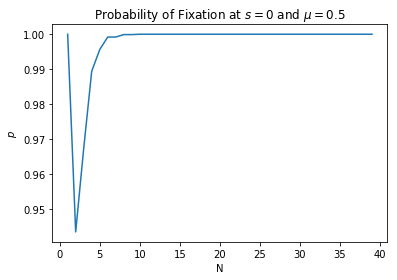

In [158]:
plt.plot(n, numpy.array(prob_fix).T)
plt.title("Probability of Fixation at $s = 0$ and $\mu = 0.5$")
plt.xlabel("N")
plt.ylabel("$p$")
plt.show()

When $N = 0$, it does not matter whether the probability of fixation is $0$ or $1$. Because $\mu = 0.5$, even at $N \approx 10$, the probability of fixation is $1$.

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [159]:
exp_t_emerge + numpy.mean(times_to_fixation)

6.116800000001819

### Part (c)

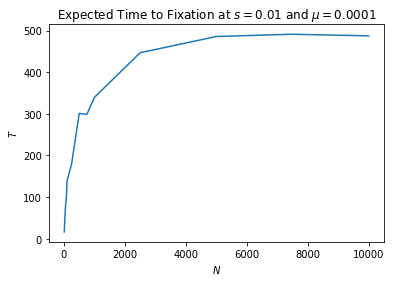

In [101]:
n = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.01, mu = 0.0001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.title("Expected Time to Fixation at $s = 0.01$ and $\mu = 0.0001$")
plt.xlabel("$N$")
plt.ylabel("$T$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [102]:
numpy.mean(times_to_fixation)

487.5338541666667

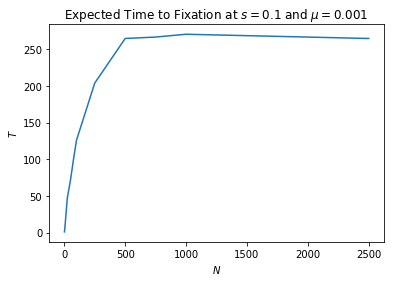

In [99]:
n = [1, 5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.01, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.title("Expected Time to Fixation at $s = 0.1$ and $\mu = 0.001$")
plt.xlabel("$N$")
plt.ylabel("$T$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [100]:
numpy.mean(times_to_fixation)

264.6901121304791

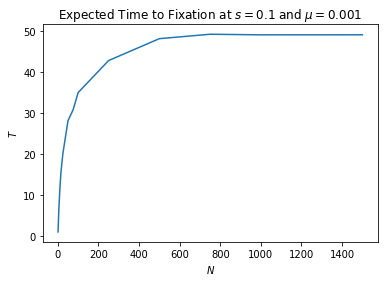

In [93]:
n = [1, 5, 10, 15, 25, 50, 75, 100, 250, 500, 750, 1000, 1500]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.1, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.title("Expected Time to Fixation at $s = 0.1$ and $\mu = 0.001$")
plt.xlabel("$N$")
plt.ylabel("$T$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [94]:
numpy.mean(times_to_fixation)

49.09758771929825

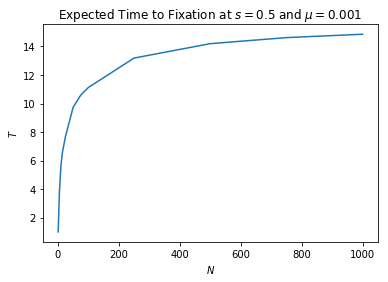

In [95]:
n = [1, 5, 10, 15, 25, 50, 75, 100, 250, 500, 750, 1000]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 1.5, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))
    
plt.plot(n, numpy.array(time_fix).T)
plt.title("Expected Time to Fixation at $s = 0.5$ and $\mu = 0.001$")
plt.xlabel("$N$")
plt.ylabel("$T$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [96]:
numpy.mean(times_to_fixation)

14.855434782608695

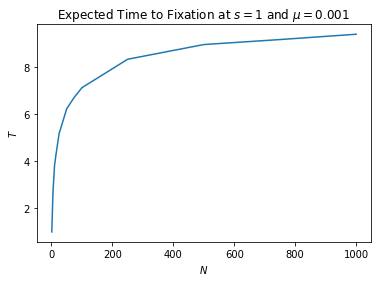

In [97]:
n = [1, 5, 10, 15, 25, 50, 75, 100, 250, 500, 750, 1000]

time_fix = []
for n_pop in n:
    simulations, times_to_fixation, total_fix, exp_t_emerge, p_0 = wf_sim_emerg(n = n_pop, n_sim = 1000, w = 2, mu = 0.001)
    time_fix.append(numpy.mean(times_to_fixation))

plt.plot(n, numpy.array(time_fix).T)
plt.title("Expected Time to Fixation at $s = 1$ and $\mu = 0.001$")
plt.xlabel("$N$")
plt.ylabel("$T$")
plt.show()

The expected time for a new allele to emerge and fix in the population is calculated as follows

In [98]:
numpy.mean(times_to_fixation)

9.391259105098856